# Data analysis 
in this project we are going to read Netflix Movies and TV Shows data to Netflix viewership analysis 

# #import liberaries

In [1]:
import ipywidgets as widgets
from IPython.display import display

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
from scipy.stats.mstats import trimmed_var

## import data

In [36]:
df=pd.read_csv('netflix_titles.csv')
print(df.info())
print(df.columns)
df.head(4).T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


,0,1,2,3
show_id,81145628,80117401,70234439,80058654
type,Movie,Movie,TV Show,TV Show
title,Norm of the North: King Sized Adventure,Jandino: Whatever it Takes,Transformers Prime,Transformers: Robots in Disguise
director,"Richard Finn, Tim Maltby",NaN,NaN,NaN
cast,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...",Jandino Asporaat,"Peter Cullen, Sumalee Montano, Frank Welker, J...","Will Friedle, Darren Criss, Constance Zimmer, ..."
country,"United States, India, South Korea, China",United Kingdom,United States,United States
date_added,"September 9, 2019","September 9, 2016","September 8, 2018","September 8, 2018"
release_year,2019,2016,2013,2016
rating,TV-PG,TV-MA,TV-Y7-FV,TV-Y7
duration,90 min,94 min,1 Season,1 Season


# # number of unique value in each columns

In [4]:
df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

as shown columns we can deeply analysis are [type,release_year,rating]

# # Lets start with type

In [5]:
df['type'].value_counts(normalize=True)

Movie      0.684151
TV Show    0.315849
Name: type, dtype: float64

lets draw it 

Text(0.5, 1.0, 'Distribution of move types')

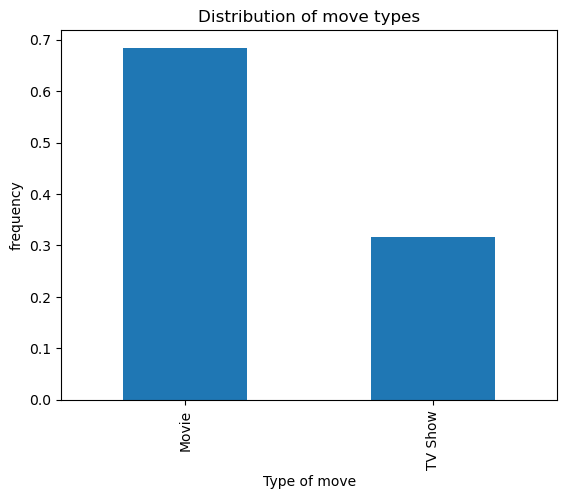

In [6]:
df['type'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Type of move')
plt.ylabel('frequency')
plt.title('Distribution of move types')

good Movie is much higher

but one second the data lets drop null attributes and see the distribution a gain 

In [7]:
df1=df.dropna(inplace=True)

Text(0.5, 1.0, 'Distribution of move types')

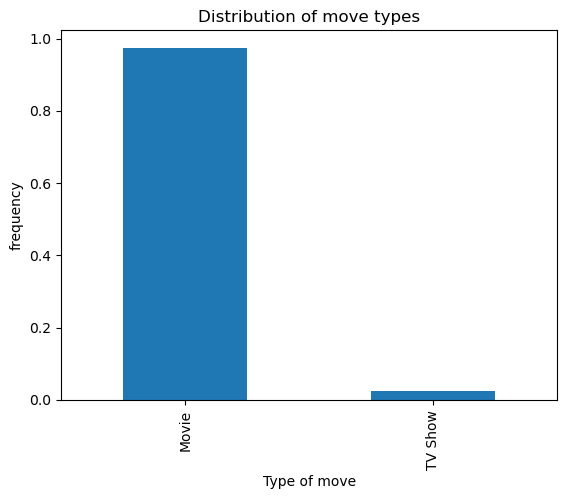

In [8]:
df['type'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Type of move')
plt.ylabel('frequency')
plt.title('Distribution of move types')

OMG 
its look like that null data make some thing bad ,
 keep this information in your mind 

# Rating Distribution

In [9]:
df['rating'].value_counts(normalize=True)

TV-MA       0.315050
TV-14       0.242978
R           0.132750
TV-PG       0.094860
PG-13       0.073662
PG          0.046635
NR          0.046370
TV-G        0.014308
TV-Y7       0.012719
G           0.009274
TV-Y        0.006359
TV-Y7-FV    0.002915
UR          0.001855
NC-17       0.000265
Name: rating, dtype: float64

Text(0.5, 1.0, 'Distribution of each rate')

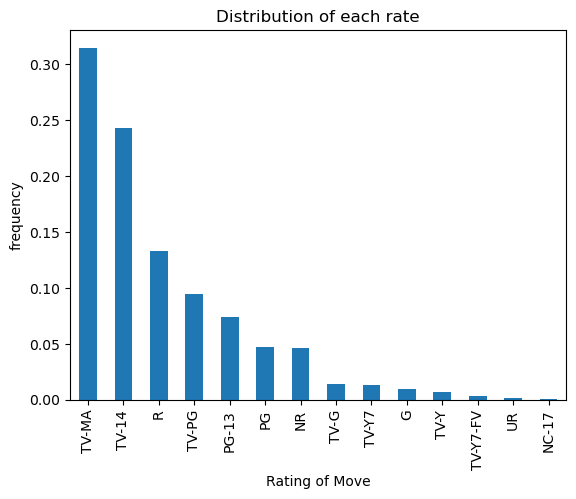

In [10]:

df['rating'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Rating of Move')
plt.ylabel('frequency')
plt.title('Distribution of each rate')

[TV-MA , TV-14] they are like a kings of the Rate , but wtat will happen if we marge the rate with type of Move

In [11]:
type_rate=df['rating'].groupby(df['type']).value_counts().rename('count')
type_rate=type_rate.to_frame().reset_index()

In [12]:
type_rate.head(3)

,type,rating,count
0,Movie,TV-MA,1157
1,Movie,TV-14,878
2,Movie,R,500


In [32]:
px.bar(data_frame=type_rate,x='rating',y='count',color='type',barmode='group')


ow ow ow 
,No defference between the two plots 
,but look for TV Show so small !!

# # lets try describe Date

## print date column and see type

In [33]:
df['date_added'].head()

0    September 9, 2019
4    September 8, 2017
6    September 8, 2017
7    September 8, 2017
9    September 8, 2017
Name: date_added, dtype: object

we have to things to discuss 
1- the type of column should be datetime
2-we have to separate year-month-day may be is needed

In [34]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);

# # what about the correlation between rating and Duration 

lets find out the distribution of the mean value of the values of duration for each unique value of rating

print the duration columns and see the type

In [37]:
df['duration'].head(3)

0      90 min
1      94 min
2    1 Season
Name: duration, dtype: object

also two things to discuss 
1- the type is object 
2-there are seasons on the column 
--lets try to change the type to integer and delet season values

In [38]:
d=df['duration'].apply(trimmed_var)
d=df['duration'].str.contains('Season',regex=False)
Duration_Year=df[d==False]
Duration_Year.loc[:,['duration']]=Duration_Year['duration'].str.replace('min',' ')
Duration_Year.loc[:,['duration']]=Duration_Year['duration'].astype(int)
Duration_Year['duration']

C:\Users\Ammar\anaconda\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        90
1        94
4        99
6       110
7        60
       ... 
5577     70
5578    102
5579     88
5580    109
6231     60
Name: duration, Length: 4265, dtype: int32

In [64]:
q1,q9=Duration_Year['duration'].quantile([0.1,0.9])
mask=Duration_Year['duration'].between(q1,q9)
print(len(Duration_Year[mask]))
Duration_Year[mask].head(3)

3420


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...


We did it -good

In [68]:
D_R_D=Duration_Year.groupby('rating')['duration'].median().sort_values()

Text(0.5, 1.0, 'average of time taken by each type of rating')

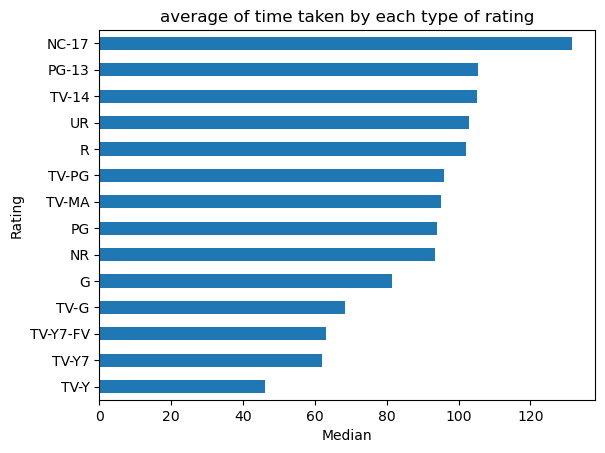

In [70]:
D_R_D.plot(kind='barh')
plt.xlabel('Median')
plt.ylabel('Rating')
plt.title('average of time taken by each type of rating')

OMG ,,, now we can find out many things from ower data can help the owners to arise the maximum value of Net profit

##  ['country','cast','director']
now lets plot World Cloud image to clear the most worlds repeaated in each feature

In [71]:
df[['country','cast','director']].head()

,country,cast,director
0,"United States, India, South Korea, China","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Richard Finn, Tim Maltby"
1,United Kingdom,Jandino Asporaat,NaN
2,United States,"Peter Cullen, Sumalee Montano, Frank Welker, J...",NaN
3,United States,"Will Friedle, Darren Criss, Constance Zimmer, ...",NaN
4,United States,"Nesta Cooper, Kate Walsh, John Michael Higgins...",Fernando Lebrija


In [72]:
df[['country','cast','director']].nunique()

country      554
cast        5469
director    3301
dtype: int64

In [73]:
df['country'].value_counts().head(10)

United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: country, dtype: int64

<AxesSubplot:>

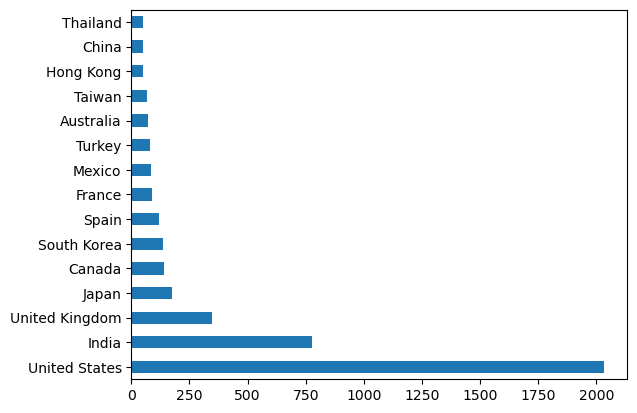

In [74]:
df['country'].value_counts().head(15).plot(kind='barh')

WOW seems that United States and India the owners of the cast members 

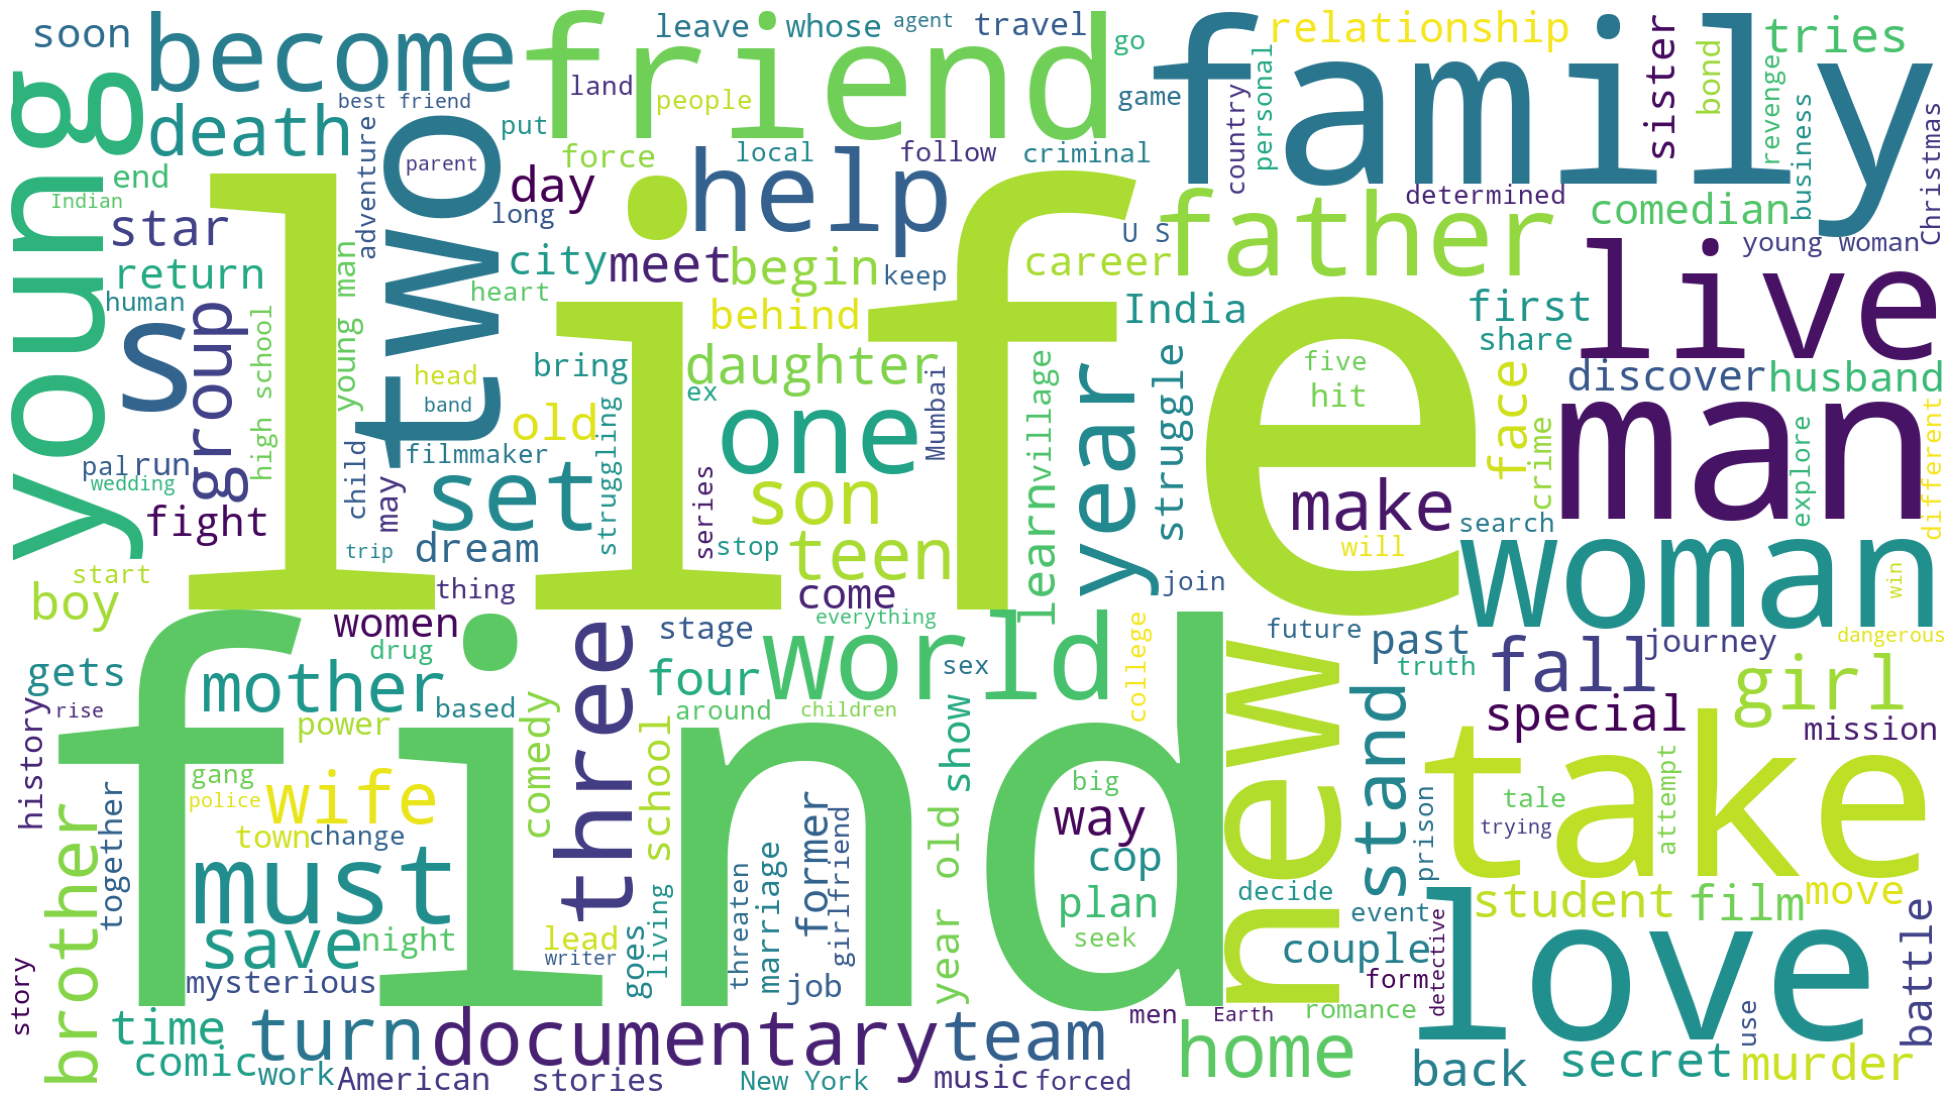

In [75]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df[df['type']=='Movie']['description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

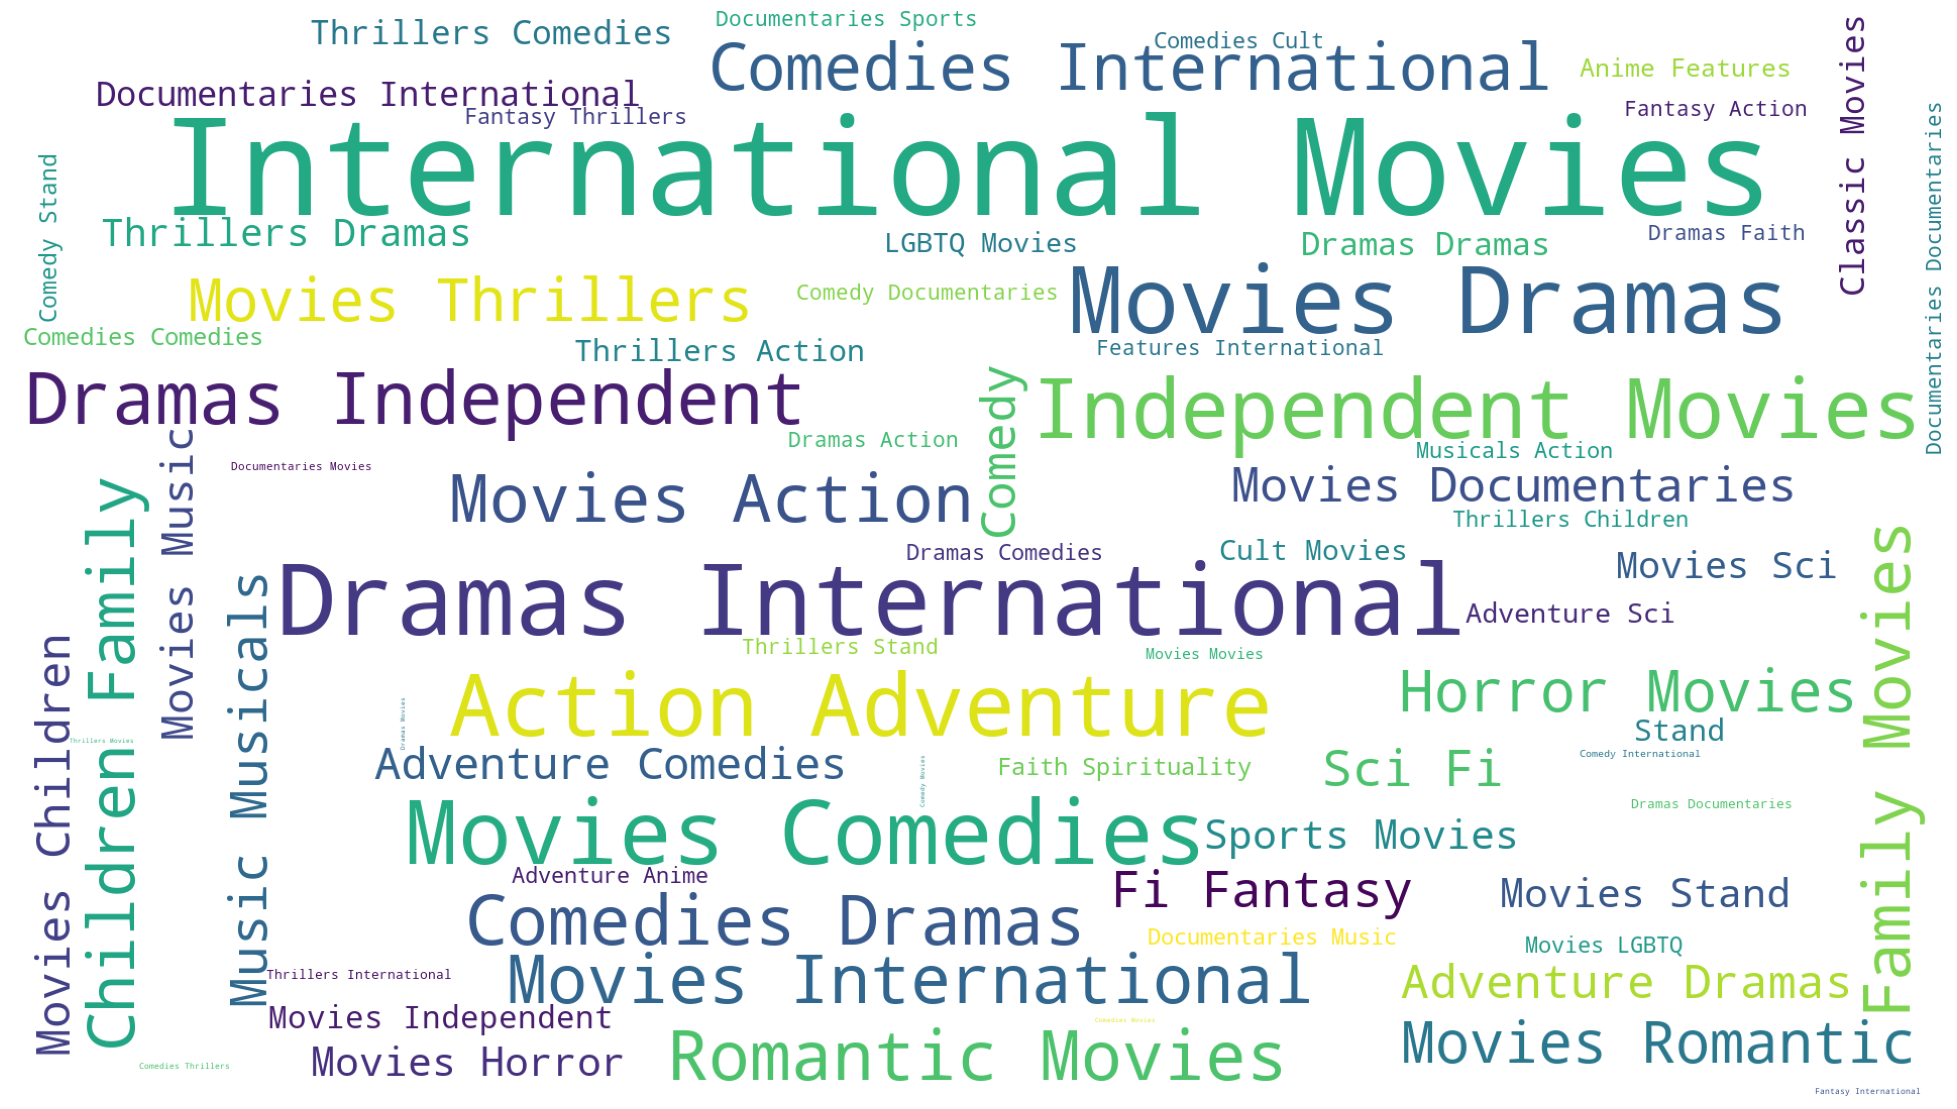

In [154]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df[df['type']=='Movie']['listed_in']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()


thats it will done 

thanks for reading